# Desafío 17/06

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

## Genere una submuestra de casos

- Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria. __RUT: Seleccionado 2085__
- Seleccione el 50% de los casos.
- Cada base generada debe contener los siguientes elementos:
    - El índice de desarrollo humano ( undp_hdi )
    - El nombre del país ( ccodealp )
    - La región a la que pertenece ( ht_region )
    - El PIB per capita. ( gle_cgdpc )
    - El total de la población ( imf_pop )
    
- Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación: __Apellido: F__
    - ffp_hf : Human Flight and Brain Drain
    - wef_qes : Quality of the educational system
    - wdi_expedu : Government expenditure on education, total (% of GDP)
    - wdi_ners : School enrollment, secondary (% net)
- Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    - wef_imort : Infant mortality, deaths/1000 live births
    - who_alc2000 : Alcohol consumption per capita (2000-)
    - who_tobt : Current smoking of any tobacco product (Total).
    - wdi_exph : Government expenditure on health, total (% of GDP)
- Guarde esta tabla procesada en un nuevo objeto
- Renombre las categorías de la variable ht_region de números a regiones

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

df = pd.read_csv("qog_std_cs_jan18.csv")
df_full = df 

# Columnas a seleccionar para apellido rango A-M

columnasBase = ["undp_hdi", "ccodealp", "ht_region", "gle_cgdpc", "imf_pop"]
columnasAF = ["ffp_hf", "wef_qes", "wdi_expedu", "wdi_ners"]
columnas = columnasBase + columnasAF

# Obtener subset al azar

df = df.loc[:,columnas].sample(frac=0.5, random_state = np.random.seed(2085) )

# Renombrar subset
df['ht_region'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia','Pacific', 'Caribbean'])

df.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
37,NaN,TWN,EastAsia,33965.8710,23.434000,NaN,3.908831,NaN,NaN
142,0.798,ROU,EastEurope,14563.1400,19.952999,4.5,3.833498,3.12918,83.929939
188,0.794,URY,LatAm,12804.8400,3.454000,4.4,2.903505,4.35694,76.348099
28,0.558,KHM,SouthEastAsia,1927.0601,14.605000,7.5,3.176270,1.90197,NaN
93,0.582,LAO,SouthEastAsia,2926.7700,6.898000,7.4,3.834710,3.32011,50.828941


    
## Genere una función que ingrese su objeto y devuelva:

- Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
    - Para cada variable discreta, que calcule la frecuencia.
    - Reporte las estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop .
    - Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

In [2]:
print(df.dtypes)
# Estadistica descriptiva para variables continuas

def descriptiva(dataframe):
    
    for column in dataframe.loc[:, dataframe.dtypes == np.float64].columns:
        print("Variable: " + column)
        print(dataframe[column].describe().round(3))

    # Estadistica descriptiva para variables discretas

    for column in dataframe.loc[:, dataframe.dtypes == object].columns:
        print("Variable: " + column)
        print(dataframe[column].value_counts("%"))

descriptiva(df)

undp_hdi      float64
ccodealp       object
ht_region      object
gle_cgdpc     float64
imf_pop       float64
ffp_hf        float64
wef_qes       float64
wdi_expedu    float64
wdi_ners      float64
dtype: object
Variable: undp_hdi
count    93.000
mean      0.690
std       0.161
min       0.351
25%       0.555
50%       0.702
75%       0.834
max       0.948
Name: undp_hdi, dtype: float64
Variable: gle_cgdpc
count        97.000
mean      14547.540
std       19270.122
min         324.160
25%        2584.600
50%        5733.370
75%       19990.939
max      108481.130
Name: gle_cgdpc, dtype: float64
Variable: imf_pop
count     74.000
mean      28.525
std       53.330
min        0.011
25%        3.099
50%        9.673
75%       25.247
max      318.789
Name: imf_pop, dtype: float64
Variable: ffp_hf
count    88.000
mean      5.426
std       2.015
min       1.000
25%       3.675
50%       5.750
75%       7.025
max       8.900
Name: ffp_hf, dtype: float64
Variable: wef_qes
count    76.000
mean  

## Genere una función que liste las observaciones perdidas de una variable

- La función debe contener los siguientes argumentos:
    - dataframe : La función debe ingresar un objeto DataFrame.
    - var : Variable a inspeccionar.
    - print_list : Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.
- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando print_list = True , debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos.
- Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [3]:
def obs_perdidas(dataframe, columna, print_list=False):
    lista = []
    
    numero_registros = dataframe[columna].shape[0]
    lista_NOK = df.loc[df[columna].isnull()]['ccodealp'].unique()
    numero_NOK = dataframe[columna].isna().sum()
    
    try:
        porcentaje_NOK = (numero_NOK/numero_registros).round(3)
    except:
        porcentaje_NOK = 0
    
    if print_list:
        display(Markdown("#### Columna " + columna))
        print(list(lista_NOK))
        
    return numero_NOK, porcentaje_NOK

# Obtener lista de diccionarios a partir de resultados

lista_obs_perdidas = []
for columna in df.columns:
    numero_NOK, porcentaje_NOK = obs_perdidas(df,columna, False)
    lista_obs_perdidas.append({"columna": columna, "numero_NOK": numero_NOK, "porcentaje_NOK":porcentaje_NOK})

# Crear dataframe a partir de diccionario

df_des3 = pd.DataFrame(lista_obs_perdidas)
# Imprimir dataframe de resultados

display(Markdown("### Tabla de observaciones perdidas"))
display(df_des3)

display(Markdown("### Columnas con mayor porcentaje de registros perdidos (3)"))
display(df_des3.sort_values("porcentaje_NOK", ascending=False).iloc[:3])

display(Markdown("### Lista de países con ausencia de datos"))

lista_mayores_perdidas = ["wdi_ners","wdi_expedu", "wef_qes"]
for columna in lista_mayores_perdidas:
    numero_NOK, porcentaje_NOK = obs_perdidas(df,columna, True)

### Tabla de observaciones perdidas

,columna,numero_NOK,porcentaje_NOK
0,undp_hdi,4,0.041
1,ccodealp,0,0.000
2,ht_region,0,0.000
3,gle_cgdpc,0,0.000
4,imf_pop,23,0.237
5,ffp_hf,9,0.093
6,wef_qes,21,0.216
7,wdi_expedu,20,0.206
8,wdi_ners,28,0.289


### Columnas con mayor porcentaje de registros perdidos (3)

,columna,numero_NOK,porcentaje_NOK
8,wdi_ners,28,0.289
4,imf_pop,23,0.237
6,wef_qes,21,0.216


### Lista de países con ausencia de datos

#### Columna wdi_ners

['TWN', 'KHM', 'MCO', 'AGO', 'COD', 'PNG', 'ARM', 'GMB', 'MDV', 'TGO', 'AND', 'MNG', 'NAM', 'CZE', 'DJI', 'DEU', 'GAB', 'TUN', 'COG', 'LBR', 'GNB', 'CAN', 'VNM', 'KIR', 'SGP', 'LBY', 'ZAF', 'SEN']


#### Columna wdi_expedu

['TWN', 'DMA', 'AGO', 'PNG', 'TUV', 'MAR', 'JOR', 'NAM', 'LSO', 'DJI', 'GRC', 'COG', 'MMR', 'NRU', 'KIR', 'GRD', 'PLW', 'LBY', 'WSM', 'EGY']


#### Columna wef_qes

['MCO', 'DMA', 'PNG', 'TUV', 'MDV', 'TGO', 'AND', 'AFG', 'STP', 'DJI', 'BLR', 'COG', 'GNB', 'NRU', 'NER', 'KIR', 'GRD', 'PLW', 'WSM', 'FJI', 'COM']


## Grafique los histogramas

- Genere una función que grafique un histograma en conjunto y señale las medias.
    - La función debe incluír los siguientes argumentos:
        - dataframe : La base de datos donde se encuentran los datos específicos. __Nota: Se usa la la base de datos con el 50% de los datos.__
        - var : La variable a graficar.
        - sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False .
        - true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.__Nota: La base de datos completa se pasa como variable global.__ 
- Implemente las funciones para las 4 variables seleccionadas según su grupo.
- ¿En qué variables la media de la submuestra es mayor a la de la muestra completa? 
    - __Resp: En las variables wef_qes, wdi_expedu__

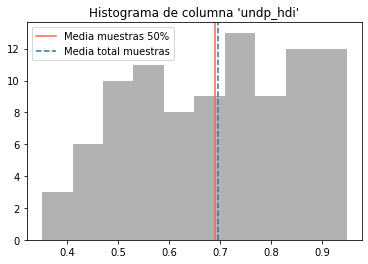

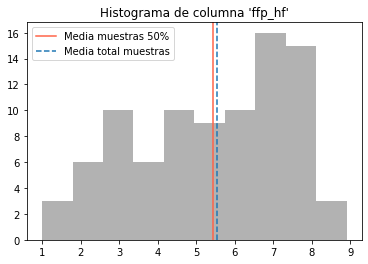

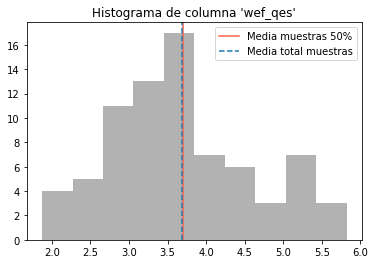

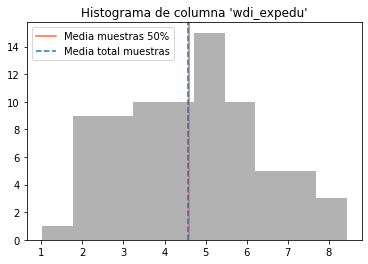

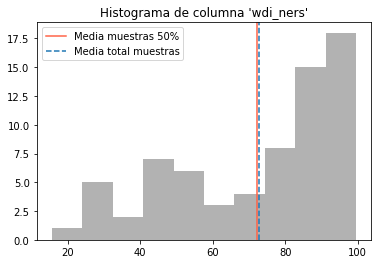

In [10]:
import matplotlib.pyplot as plt

def graficar_histograma(dataframe, var, sample_mean=False, true_mean=False):
    df_temp = dataframe[var].dropna()
    plt.figure()
    plt.hist(df_temp, color='k', alpha=0.3)
    plt.title("Histograma de columna '" + var + "'")
    
    if sample_mean:
        plt.axvline(df_temp.mean(), color="tomato", label="Media muestras 50%")
        
    if true_mean:
        plt.axvline(df_full[var].dropna().mean(), linestyle = "--", label="Media total muestras")
        
    plt.legend()
    
graficar_histograma(df, "undp_hdi", True, True)

for columna in columnasAF:
    graficar_histograma(df, columna, True, True)

## Genere una función que devuelva un dotplot

- La función debe contener los siguientes argumentos como argumentos:
    - dataframe : La tabla de datos donde buscar las variables.
    - plot_var : La variable a analizar y extraer las medias.
    - plot_by : La variable agrupadora.
    - global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False.
    - statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean.
- Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [12]:
display(Markdown("### Porcentajes de registros perdidos"))
display(df_des3.sort_values("porcentaje_NOK", ascending=True))

### Porcentajes de registros perdidos

,columna,numero_NOK,porcentaje_NOK
1,ccodealp,0,0.000
2,ht_region,0,0.000
3,gle_cgdpc,0,0.000
0,undp_hdi,4,0.041
5,ffp_hf,9,0.093
7,wdi_expedu,20,0.206
6,wef_qes,21,0.216
4,imf_pop,23,0.237
8,wdi_ners,28,0.289


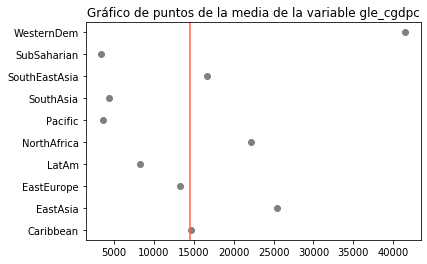

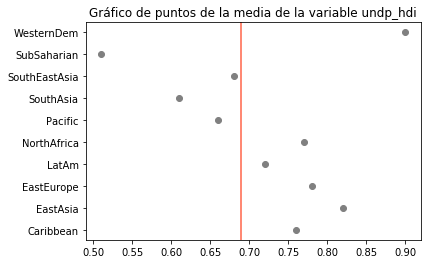

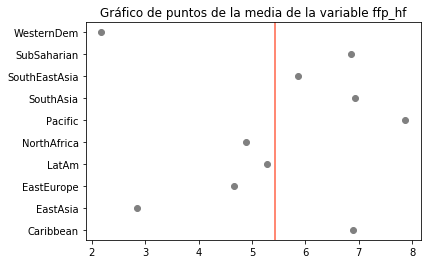

In [13]:
def graficar_dotplot(dataframe, plt_var, plot_by, global_stat=False, statistic="mean"):
    grupo = dataframe.groupby(plot_by)[plt_var]
    plt.figure()
    
    if statistic == "mean":
        estadistica = "media"
        grupo = round(grupo.mean(),2)
        plt.plot(grupo.values, grupo.index, 'o', color = 'grey')
        plt.title("Gráfico de puntos de la " + estadistica + " de la variable "  + plt_var)
    elif statistic == "median":
        estadistica = "mediana"
        grupo = round(grupo.median(),2)
        plt.plot(grupo.values, grupo.index, 'o', color = 'grey')
        plt.title("Gráfico de puntos de la " + estadistica + " de la variable "  + plt_var)
        
    if global_stat:
        plt.axvline(dataframe[plt_var].mean(), color="tomato", label="Media muestras 50%")

    #plt.legend()

lista_menores_perdidas = ["gle_cgdpc","undp_hdi", "ffp_hf"]

for columna in lista_menores_perdidas:
    graficar_dotplot(df, columna, "ht_region", True)

## Guarde la base de datos

- La submuestra creada tiene un método llamado to_csv. Acceda a éste y guarde la base de datos con la siguiente nomenclatura: subsample_DFN_demo.csv. Súbala a la plataforma, junto al desafío

In [14]:
df.to_csv("subsample_DFN_demo.csv")